# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score `1 = active user`, `0 = inactive user`) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: predict/determine which customers will convert from free-tier to paying

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, and profession

#### 3. What timeframe is this data relevant for?

Answer: Jan-Apr 2015

#### 4. What is the hypothesis?

Answer: Customers with more favorable useage data (recent log in and/or activity score = 1) will more likely convert from the free-tier.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 1 - admitted, 0 - not admitted | binary
gpa | floating point indicating grade point average | continuous 
gre | integer indicating score on graduate exam | continuous
prestige | provides prestige on scale of 1-4 for school | categorical 


In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df1 = pd.read_csv("/Users/antuanweeks/PythonCode/GA_DataScience/projects/antuan_weeks/project-1/admissions.csv")

In [3]:
df1.dtypes # checking the variable types in the dataset

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [4]:
df1.describe() # we see there are 400 observations, but some rows are missing indpendent variable values

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
null_data = df1[df1.isnull().any(axis=1)] # displaying the values that are null in dataset
null_data

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [6]:
df = df1.dropna(how='any')

In [7]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1184615d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1187430d0>]], dtype=object)

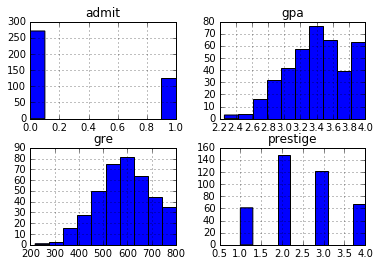

In [8]:
df.hist() # visualization of frequencies of variables within dataset

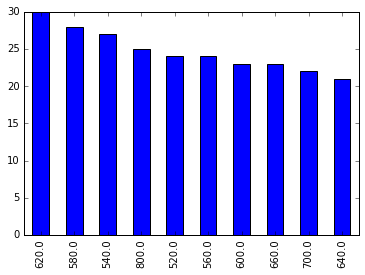

In [9]:
gre_count = df['gre'].value_counts() #showing distribution of gre scores

gre_count.head(10).plot(kind='bar')

#### What is the impact of GRE score on admission (see graph below)?

In [10]:
df800 = df[df['gre'] > 700]['admit'] # computing the counts for admission based on score range 
df700 = df[(df['gre'] > 600) & (df['gre'] <= 700)]['admit']
df600 = df[(df['gre'] > 500) & (df['gre'] <= 600)]['admit']
df500 = df[(df['gre'] > 400) & (df['gre'] <= 500)]['admit']
df800_1 = df[(df['gre'] > 700) & (df['admit'] == 1)]['admit'].count()
df700_1 = df[(df['gre'] > 600) & (df['gre'] <= 700) & (df['admit'] == 1)]['admit'].count()
df600_1 = df[(df['gre'] > 500) & (df['gre'] <= 600) & (df['admit'] == 1)]['admit'].count()
df500_1 = df[(df['gre'] > 400) & (df['gre'] <= 500) & (df['admit'] == 1)]['admit'].count()
df800_0 = df[(df['gre'] > 700) & (df['admit'] == 0)]['admit'].count()
df700_0 = df[(df['gre'] > 600) & (df['gre'] <= 700) & (df['admit'] == 0)]['admit'].count()
df600_0 = df[(df['gre'] > 500) & (df['gre'] <= 600) & (df['admit'] == 0)]['admit'].count()
df500_0 = df[(df['gre'] > 400) & (df['gre'] <= 500) & (df['admit'] == 0)]['admit'].count()
df800_std = df800.std()
df700_std = df700.std()
df600_std = df600.std()
df500_std = df500.std()
agg_admit = [df500_1, df600_1, df700_1, df800_1]
agg_nonadmit = [df500_0, df600_0, df700_0, df800_0]
agg_std = [df800_std, df700_std, df600_std, df500_std]
loc = np.arange(4)
width = 0.6

The graph below shows that a smaller proprotion of students applying with lower GRE score ranges are admitted compared to the number of students applying within that score range.

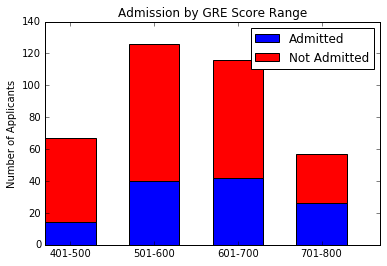

In [11]:
plot1 = plt.bar(loc, agg_admit, width, color='b')
plot2 = plt.bar(loc, agg_nonadmit, width, color='r', bottom=agg_admit)
plt.ylabel('Number of Applicants')
plt.title('Admission by GRE Score Range')
plt.xticks(loc + width/2., ('401-500', '501-600', '601-700', '701-800'))
plt.legend((plot1[0], plot2[0]), ('Admitted', 'Not Admitted'))

We would like to explore the association between 'admit' and 'gpa,' 'gre,' and 'prestige.'

#### 2. What is the outcome?

Answer: determine probability of admission based on underlying characteristics/determinants

#### 3. What are the predictors/covariates? 

Answer: 'gpa,' 'gre,' and 'prestige' are the predictors/covariates, as these variables are used in the admissions process to determine whether or not an applicant will be admitted 

#### 4. What timeframe is this data relevant for?

Answer: there is no explicit timeframe given with the dataset (we assume one application cycle). The generated data is hypothetical.

#### 4. What is the hypothesis?

Answer: No single predictor alone will predict graduate school admission. Admission will inversely vary with decreasing undergraduate college prestige and have a positive correlation with gpa and gre, allowing for greater likelihood of admission for students with good scores from prestigious schools.

## Problem Statement

Discern the correlation between UCLA graduate applicant characteristics and admission. Using an admissions dataset published by UCLA, I will test for the drivers of graduate school admission. The data is hypothetical and generated for the purposes of providing an example for R Data analysis using Logit Regression. The dataset includes four variables ('admit,' 'gre,' 'gpa,' and 'prestige') in which 'admit' is the dependent variable and 'gre,' 'gpa,' and 'prestige' are predictor variables. I believe no single predictor alone can sufficiently predict graduate school admision. My hypothesis is that admission will vary inversely with decreasing undergraduate college prestige and have a positive correlation with gpa and gre, allowing for greater likelihood of admission for students with good scores from prestigious schools.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: One goal of the exploratory analysis is to become familiar with the dataset: its variables and the completeness of the dataset. It is important to understand what the variable values represent (e.g. is a prestige score of 1 good or bad) so that interpretations from analysis are accurate. It is also important to determine the completeness of the dataset in order to gauge how much confidence you can place in some of your findings. If half of the observations are null, or there are few observations in the first place, it will be challenging/not possible to establish causal links or correlation.

#### 2a. What are the assumptions of the distribution of data? 

Answer: There will be multiple distribution types since the variable type varies. Poisson binomial distribution for the binary 'admit' variable, and normal distributions for the continuous and categorical variables. 

#### 2b. How will you determine the distribution of your data? 

Answer: We can plot the frequencies of each variable using .hist() to see the distribution of each variable (see below).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195d39d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119b8bad0>]], dtype=object)

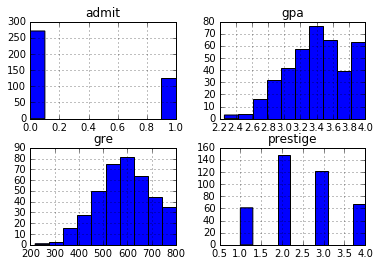

In [12]:
df.hist()

#### 3a. How might outliers impact your analysis? 

Answer: After removing rows that had missing values, the data does not appear to be skewed much by outliers. We choose to remove the data that is missing because it will skew our results. Without all of the predictors included in a row, the model will be incomplete for a particular row and may lead us to assumptions about variable correlation that are not true. The box plots below provide some insight into why we may not remove additional outliers in our analyses. 

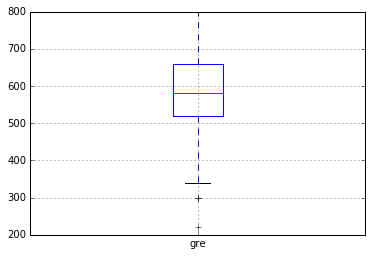

In [13]:
df.boxplot('gre', return_type='axes')

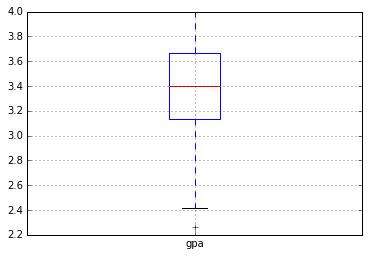

In [14]:
df.boxplot('gpa', return_type='axes')

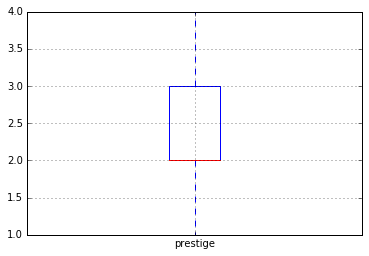

In [15]:
df.boxplot('prestige', return_type='axes')

#### 3b. How will you test for outliers? 

Answer: We can test for outliers using standard deviation testing. If a value is more than 3 standard deviations from the mean, we can choose to omit the value (see below). 

In [16]:
df[np.abs(df.gre-df.gre.mean())>=(3*df.gre.std())] # this value is the only outlier with this method (see below). 
# Below I will test if removing the value has any significant effect. If not, we will keep the value.

,admit,gre,gpa,prestige
304,0,220.0,2.83,3.0


In [17]:
df[np.abs(df.gpa-df.gpa.mean())>=(3*df.gpa.std())]

,admit,gre,gpa,prestige


In [18]:
df[np.abs(df.prestige-df.prestige.mean())>=(3*df.prestige.std())]

,admit,gre,gpa,prestige


In [19]:
df2 = df[np.abs(df.gre-df.gre.mean())<=(3*df.gre.std())] # setting new data frame w/out outlier

In [20]:
df.corr() # original dataframe (subtracting null values) correlation matrix

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [21]:
df2.corr() # correlation matrix with outlier removed

,admit,gre,gpa,prestige
admit,1.000000,0.178118,0.172145,-0.242864
gre,0.178118,1.000000,0.376383,-0.121800
gpa,0.172145,0.376383,1.000000,-0.059141
prestige,-0.242864,-0.121800,-0.059141,1.000000


the above tests show that there is no significant effect from removing the outlier. df represents the original dataset, while df2 represents the dataset with outlier removed. Note magnitudes are similar and all signs are the same.

#### 4a. What is collinearity? 

Answer: Collinearity occurs when two or more predictor variables are highly correlated, leading to predictability of the variables based on the presence or occurrence of the other. This is an issue in regression, because it is hard to discern what is the ultimate cause or reason for a dependent change if multiple features in the analysis are contributing to the change.

#### 4b. How will you test for collinearity? 

Answer: The above tests provide a matrix of correlation coefficients for the variables in the database. From first glance, there appear to be collinearity between the 'gre' and 'gpa' variables. We can attempt to isolate one of the variables by running the model without the other in order to tease out the effect of an individual variable.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now. 

Answer: To begin, we will become familiar with the dataset. To do this, we will plot variable frequency tables to see the data distributions, and test for outliers within the dataset. If we find that the dataset includes outliers that significantly impact the analysis, we will drop the outliers. We will test for outliers by removing any values that are more than three standard deviations away from the mean. We also will remove any rows that have missing values, as to avoid skewing our analyses. Following our test for outliers, we will test for multicollinearity by genearating a correlation matrix. If we find that any of the predictor variables are highly correlated, we will attempt to discern the true impact by dropping one or more of the potential candidates for multicollinearity. This will allow us to more accurately tease out the effects of individual predictors.

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

#### 1. Analysis Method Outline

To predict an outcome, we will use logistic regression. This will allow us to discern the causal effects of each predictor variable upon our dependent variable. Below are the steps to prepare and analyze the dataset:
- acquire dataset
- explore dataset in order to understand variables
- modify datset in preparation for logistic regresion (linear regression has continuous dependent variable; logistic has a limited number of outcomes. since our dataset dependent variable is binary, logistic fits well)
    - create dummy variables for categorical 'pretige' variable
    - determine if any variables are effected by multicollinearity; if so determine if variables will be analyzed separately
- from regression results, determine if results are significant
- interpret and summarize results

#### 2. Alternative Problem Statement
Discern the pretige of a UCLA graduate school applicant's undergraduate school. Using an admissions dataset published by UCLA, I will test to see if the prestige of an applicant's undergraduate college is inferable from other variables within the dataset. The data is hypothetical and generated for the purposes of providing an example for R Data analysis using Logit Regression. The dataset includes four variables ('admit,' 'gre,' 'gpa,' and 'prestige') in which 'prestige' is the dependent variable and 'gre,' 'gpa,' and 'admit' are predictor variables. My hypothesis is that there will be a positive correlation between prestige and the various predictor variables, and that GRE score will contribute most to the predictive model--a higher GRE score coupled with the other variables being favorable will imply an applicant from a more prestigious undergraduate school.

#### 3. Assumptions and Risks of Alternative Model
We will assume that the continuous variables are distributed normally. If the dataset is not a random sampling, there might be biases introduced into our interpretations and analysis. We must test for multicollinearity to make sure that we are determining the true effect of predictor variables and not conflating the impact of a particular set of variables. 